<a href="https://colab.research.google.com/github/Eylz-Liu/Mod-le-vol-locale/blob/main/Etude_local_vol_Dupire%20Daily_bis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Afin d'introduire les modèles à volatilité locale via la formule de Dupire, nous utilisons un exemple pratique avec une surface de volatilité implicite de l'Euro Stoxx 50 (SXE5), extraite de Bloomberg

# Scénario 2 - Simulation Dupire daily


1. Configuration : taux & surface de vol.implicite

'Surface de Volatilité Implicite sur Blommberg - EuroStoxx 50' (%):
          80%   90%   95%  100%  105%  110%  120%
0.00 an  88.9  59.0  36.8  17.0  23.5  37.1  53.3
0.08 an  36.2  24.0  18.7  14.4  12.1  13.2  20.4
0.25 an  27.8  21.0  18.1  15.6  13.9  13.1  13.8
0.50 an  24.9  20.0  17.7  15.9  14.6  13.8  13.2
1.00 an  22.9  19.5  18.0  16.7  16.1  15.7  14.9


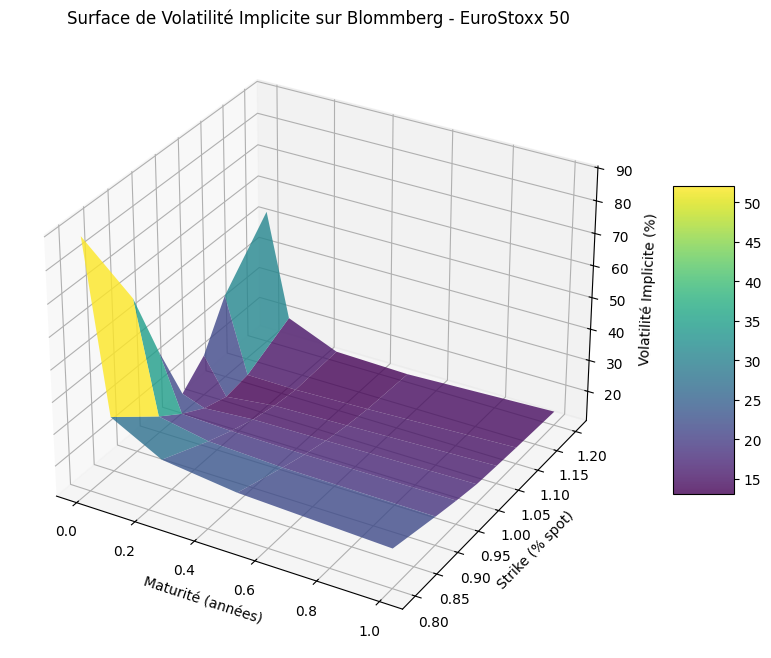

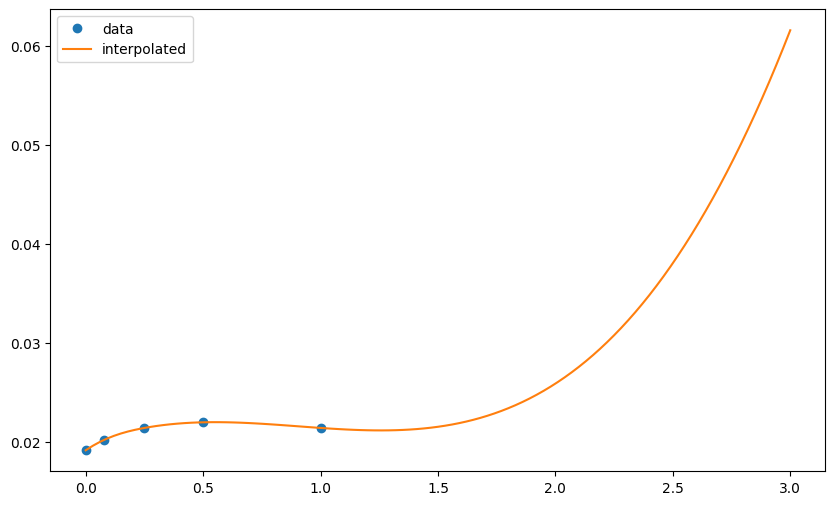

In [101]:
from scipy import interpolate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# ************ 1. collecte des données   ***************************
T = np.array ( [0.003, 0.08, 0.25, 0.5, 1.0 ] )  # Maturité en année
K = np.array (( 0.8,   0.9,  0.95, 1.0, 1.05, 1.1, 1.2 ) )     # spot price

# from mpl_toolkits.mplot3d import Axes3D

spot_price = 5655     # Prix spot fictif de l'EuroStoxx 50

# Grille de maturités (en années)
maturities = np.array([0.003, 0.08, 0.25, 0.5, 1.0 ])

# Grille de strikes (en % du spot)
strike_ratios = np.array([0.8, 0.9, 0.95, 1.0, 1.05, 1.1, 1.2])
strikes = strike_ratios * spot_price

# Surface de volatilité implicite fictive (en %) # Dimensions: 5 maturités × 7 strikes
iv_matrix = np.array([
    # 80%    90%    95%    100%    105%    110%    120%  (strike ratios)
    [88.94, 59.04, 36.85,  16.97,  23.49,  37.12,  53.28],  # 1 day (0.003 an) 11/11/2027
    [36.19, 24.03, 18.72,  14.41,  12.07,  13.24,  20.37],  # 1 mois (0.08 an) 5/12/2025
    [27.79, 21.00, 18.06,  15.58,  13.92,  13.08,  13.76],  # 3 mois (0.25 an) 20/02/2026
    [24.91, 19.95, 17.74,  15.91,  14.60,  13.79,  13.15],  # 6 mois (0.5 an)  15/05/2026
    [22.91, 19.52, 17.98,  16.68,  16.13,  15.66,  14.89],  # 1 an (1.0 an)    20/11/2026

])

# Création d'un DataFrame pour une meilleure visualisation
iv_df = pd.DataFrame(
    iv_matrix,
    index=[f'{m:.2f} an' for m in maturities],
    columns=[f'{ratio:.0%}' for ratio in strike_ratios]
)

print("'Surface de Volatilité Implicite sur Blommberg - EuroStoxx 50' (%):")
print(iv_df.round(1))
# IV_surface = interpolate.rectBivaruateSoline(T,K,IV,kx=3,ky=3,s=0.1)
# IV_surface = iv_df
# print(IV_surface.round(1))

# Création de la grille
T_mesh, K_mesh = np.meshgrid(maturities, strike_ratios)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface 3D
surf = ax.plot_surface(T_mesh, K_mesh, iv_matrix.T, cmap='viridis', alpha=0.8, linewidth=0, antialiased=True)

ax.set_xlabel('Maturité (années)')
ax.set_ylabel('Strike (% spot)')
ax.set_zlabel('Volatilité Implicite (%)')
ax.set_title('Surface de Volatilité Implicite sur Blommberg - EuroStoxx 50')

plt.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()

from scipy import interpolate

# Taux sans risque r(T):
rates_dates = np.array([0.003, 0.08, 0.25, 0.5, 1.0 ])

rates_values = np.array([0.01921, 0.02023, 0.02142, 0.02199, 0.02142])  # taux
rate_curve = interpolate.interp1d(rates_dates, rates_values,kind='cubic', fill_value='extrapolate')
r = rate_curve(T)

# Taux de dividende q(T):
# Méthode 1: Dividendes implicites depuis les forwards
# Méthode 2: Dividendes explicites actualisés q = 0.02

dividend_dates = np.array([0.003, 0.08, 0.25, 0.5, 1.0 ])

dividend_values = np.array([0.02, 0.02, 0.02, 0.02, 0.02])  # taux
dividend_curve = interpolate.interp1d(rates_dates, rates_values, kind='cubic', fill_value='extrapolate')

q = dividend_curve(T)

# plot zc curve interpolated
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
maturities = np.linspace(0, 3, num=101, endpoint=True)
plt.plot(rates_dates, rates_values, 'o', maturities, rate_curve(maturities))
plt.legend(['data', 'interpolated'], loc='best')
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (7, 5) and arg 2 with shape (9, 38).

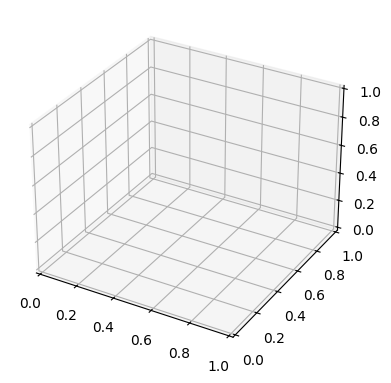

In [100]:
fig = plt.figure(figsize=(15, 10))

# Vue "Smile" - parfait pour voir la courbure par strike
ax1 = fig.add_subplot(221, projection='3d')
surf1 = ax1.plot_surface(T_mesh, K_mesh, iv_matrix.T, cmap='viridis', alpha=0.8)
ax1.view_init(elev=5, azim=0)  # Très bas pour voir le smile
ax1.set_title('Vue SMILE (azim=0°)')
ax1.set_xlabel('Maturité')
ax1.set_ylabel('Strike')
ax1.set_zlabel('Vol Impl')

# Vue "Term Structure" - parfait pour voir l'évolution temporelle
ax2 = fig.add_subplot(222, projection='3d')
surf2 = ax2.plot_surface(T_mesh, K_mesh, iv_matrix.T, cmap='viridis', alpha=0.8)
ax2.view_init(elev=5, azim=90)  # Très bas pour voir la term structure
ax2.set_title('Vue TERM STRUCTURE (azim=90°)')
ax2.set_xlabel('Maturité')
ax2.set_ylabel('Strike')
ax2.set_zlabel('Vol Impl')

# Vue 3D standard
ax3 = fig.add_subplot(223, projection='3d')
surf3 = ax3.plot_surface(T_mesh, K_mesh, iv_matrix.T, cmap='viridis', alpha=0.8)
ax3.view_init(elev=25, azim=-60)
ax3.set_title('Vue 3D Standard (azim=-60°)')

# Vue de profil
ax4 = fig.add_subplot(224, projection='3d')
surf4 = ax4.plot_surface(T_mesh, K_mesh, iv_matrix.T, cmap='viridis', alpha=0.8)
ax4.view_init(elev=15, azim=180)
ax4.set_title('Vue de Profil (azim=180°)')

plt.tight_layout()
plt.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()

2. Interpolation de la surface de volatilité implicite Bloomberg SXE5

In [ ]:
# *******************************************************
T_array = np.array ( [0.003, 0.08, 0.25, 0.5, 1.0 ] )
K_array = strikes
IV_array = iv_matrix / 100  # Conversion en decimal (0.225 au lieu de 22.5%)

# Création de la surface d'interpolation
iv_surface = interpolate.RectBivariateSpline(T_array, K_array, IV_array, kx=3, ky=3, s=0.1)  # s = paramètre de lissage

In [ ]:
# Vérification de la Surface
def check_surface_quality(iv_surface, T_array, K_array):
    """Vérifie que la surface interpolée est raisonnable"""

    # Test de monotonie
    print("Vérification de la surface...")

    # Test sur des points intermédiaires
    test_points = [
        (0.08, 4480), (0.15, 4480),(0.25, 4480), (0.4, 4480),(0.5, 4480), (0.75, 4480), (1.0, 4480),
        (0.08, 6720), (0.15, 3500), (0.4, 3700), (0.75, 3900), (1.5, 4100)
    ]

    for T, K in test_points:
        iv = iv_surface(T, K)[0][0]
        print(f"T={T:.2f}, K={K}: vol = {iv:.1%}")

    return True

# check_surface_quality(iv_surface, T_array, K_array)
check_surface_quality(iv_surface, T, K)

Vérification de la surface...
T=0.08, K=4480: vol = 50.4%
T=0.15, K=4480: vol = 31.6%
T=0.25, K=4480: vol = 18.7%
T=0.40, K=4480: vol = 19.5%
T=0.50, K=4480: vol = 27.7%
T=0.75, K=4480: vol = 48.1%
T=1.00, K=4480: vol = 22.7%
T=0.08, K=6720: vol = 26.9%
T=0.15, K=3500: vol = 31.6%
T=0.40, K=3700: vol = 19.5%
T=0.75, K=3900: vol = 48.1%
T=1.50, K=4100: vol = 22.7%


True

 2. Fonction " Calcul Dupire local vol"

In [76]:
# **************************************************************************************************************************************
def calculate_dupire_local_vol(T, K, spot, r, q):
    # 1. Volatilité implicite et ses dérivées
    iv = iv_surface(T, K)[0][0]
    if iv == 0:
        print(f"[T={T}, K={K}] ⚠️ Volatilité implicite nulle")

    # Dérivée par rapport au temps
    dT = 0.001
    iv_T_plus = iv_surface(T + dT, K)[0][0]
    dIV_dT = (iv_T_plus - iv) / dT

    # Dérivée première par rapport à K
    dK = 0.01 * spot
    iv_K_plus = iv_surface(T, K + dK)[0][0]
    iv_K_minus = iv_surface(T, K - dK)[0][0]
    dIV_dK = (iv_K_plus - iv_K_minus) / (2 * dK)

    # Dérivée seconde par rapport à K
    d2IV_dK2 = (iv_K_plus - 2 * iv + iv_K_minus) / (dK ** 2)

    # 2. Calcul de d+
    try:
        d_plus = (np.log(spot / K) + (r - q + 0.5 * iv ** 2) * T) / (iv * np.sqrt(T))
    except ZeroDivisionError:
        print(f"[T={T}, K={K}] ⚠️ Division par zéro dans d_plus")
        return 0

    # 3. Application formule Dupire
    numerator = 2 * dIV_dT + iv / T + 2 * K * (r - q) * dIV_dK
    denominator_term1 = d2IV_dK2
    denominator_term2 = -d_plus * np.sqrt(T) * (dIV_dK) ** 2
    denominator_term3 = (1 / iv) * (1 / (K * np.sqrt(T)) + d_plus * dIV_dK) ** 2

    denominator = K ** 2 * (denominator_term1 + denominator_term2 + denominator_term3)

    print(f"[T={T}, K={K}]")
    print(f"     - numerator       = {numerator}, where > dIV_dT = {dIV_dT}, and \"iv / T\" = {iv / T}, and \"dIV_dK\" = {dIV_dK}")

    print(f"  ➤ Termes du dénominateur :")
    print(f"     - denominator_Term1 (d²IV/dK²)       = {denominator_term1}")
    print(f"     - denominator_Term2 (-d⁺√T·(dIV/dK)²) = {denominator_term2}")
    print(f"     - denominator_Term3 (1/IV · ...)     = {denominator_term3}")
#--------------------------------------------------------------------------------------------------------------------------------------


# -------------------------------------------------------------------------------------------------------------------------------------------
    local_var = numerator / denominator
# -------------------------------------------------------------------------------------------------------------------------------------------

    print(f"[T={T}, K={K}] ⚠️ Variance locale: {local_var}, écart-type : {np.sqrt(local_var)}")
# -------------------------------------------------------------------------------------------------------------------------------------------


    return np.sqrt(local_var)
# -------------------------------------------------------------------------------------------------------------------------------------------

In [77]:
# !!!!!!!!!! Grille de calcul: !!!!!!!!!!!!!!!!!  version détecter vol locale = 0  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
T_grid = np.array ( [0.003, 0.08, 0.25, 0.5, 1.0 ] ) #_array
K_grid = strikes #_array

local_vol_grid = np.zeros((len(T_grid), len(K_grid)))

for i, T_val in enumerate(T_grid):
    for j, K_val in enumerate(K_grid):
        r_val = rate_curve(T_val)
        q_val = dividend_curve(T_val)  # si disponible

        # calculate_dupire_local_vol( T_val, K_val, spot_price, r_val, q_val)

        vol = calculate_dupire_local_vol(T_val, K_val, spot_price, r_val, q_val)

        if vol == 0:
            print(f"⚠️ Alerte : Volatilité locale nulle détectée pour T={T_val}, K={K_val} — valeur ignorée.")
            continue  # saute cette itération

        local_vol_grid[i, j] = vol

print("\nGrille de volatilité locale :")
for i, T_val in enumerate(T_grid):
    for j, K_val in enumerate(K_grid):
        vol = local_vol_grid[i, j]
        print(f"Vol[T={T_val:.4f}, K={K_val:.2f}] = {vol:.6f}")

print(local_vol_grid)


[T=0.003, K=4524.0]
     - numerator       = 267.5663264361645, where > dIV_dT = -5.219929424775005, and "iv / T" = 278.00618528571454, and "dIV_dK" = -0.0003717363233309602
  ➤ Termes du dénominateur :
     - denominator_Term1 (d²IV/dK²)       = -1.3147173238937584e-05
     - denominator_Term2 (-d⁺√T·(dIV/dK)²) = -3.7145360568848046e-08
     - denominator_Term3 (1/IV · ...)     = 5.8631404010411024e-06
[T=0.003, K=4524.0] ⚠️ Variance locale: -1.7856867895677973, écart-type : nan
[T=0.003, K=5089.5]
     - numerator       = 151.38860213162297, where > dIV_dT = -2.5193273951920614, and "iv / T" = 156.4272569220071, and "dIV_dK" = -0.0005221247999873576
  ➤ Termes du dénominateur :
     - denominator_Term1 (d²IV/dK²)       = 4.861442297607332e-07
     - denominator_Term2 (-d⁺√T·(dIV/dK)²) = -6.13977371701417e-08
     - denominator_Term3 (1/IV · ...)     = 4.420777874657407e-06
[T=0.003, K=5089.5] ⚠️ Variance locale: 1.2061523284768754, écart-type : 1.0982496658214267
[T=0.003, K=5372.25]

/tmp/ipython-input-1360271610.py:51: RuntimeWarning: invalid value encountered in sqrt
  print(f"[T={T}, K={K}] ⚠️ Variance locale: {local_var}, écart-type : {np.sqrt(local_var)}")
/tmp/ipython-input-1360271610.py:55: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(local_var)


In [75]:
# Paramètres EuroStoxx 50
spot = 5655  # prix spot SX5E
T_calc = 0.03  # 1 an
K_calc = spot * 0.80  # strike

# Calcul pour un point
local_vol = calculate_dupire_local_vol(
    T=T_calc,
    K=K_calc,
    spot=spot,
    r=0.01921,      # taux 1 an
    q=0.02       # dividende
)

print(f"Volatilité locale pour T={T_calc}, K={K_calc}: {local_vol:.1%}")

[T=0.03, K=4524.0]
     - numerator       = 14.336883816860126, where > dIV_dT = -4.534227652533418, and "iv / T" = 23.403197227022808, and "dIV_dK" = -0.0002996528926112601
  ➤ Termes du dénominateur :
     - denominator_Term1 (d²IV/dK²)       = -1.0597803452210789e-05
     - denominator_Term2 (-d⁺√T·(dIV/dK)²) = -2.9480692389280737e-08
     - denominator_Term3 (1/IV · ...)     = 7.143184877388393e-07
[T=0.03, K=4524.0] ⚠️ Variance locale: -0.07066526171311974, écart-type : nan
Volatilité locale pour T=0.03, K=4524.0: nan%


/tmp/ipython-input-502488832.py:113: RuntimeWarning: invalid value encountered in sqrt
  print(f"[T={T}, K={K}] ⚠️ Variance locale: {local_var}, écart-type : {np.sqrt(local_var)}")
/tmp/ipython-input-502488832.py:117: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(local_var)


[T=0.03, K=5655]
     - Term1 (d²IV/dK²)       = 5.166916485480693e-07
[T=0.11818181818181818, K=5655]
     - Term1 (d²IV/dK²)       = 2.1415783942351947e-07
[T=0.20636363636363636, K=5655]
     - Term1 (d²IV/dK²)       = 4.9484342085362364e-08
[T=0.29454545454545455, K=5655]
     - Term1 (d²IV/dK²)       = -1.4349211821651833e-08
[T=0.3827272727272727, K=5655]
     - Term1 (d²IV/dK²)       = -7.701848968117893e-09
[T=0.47090909090909094, K=5655]
     - Term1 (d²IV/dK²)       = 4.5639770244786893e-08
[T=0.5590909090909091, K=5655]
     - Term1 (d²IV/dK²)       = 1.2216787239079427e-07
[T=0.6472727272727273, K=5655]
     - Term1 (d²IV/dK²)       = 1.9837468404352311e-07
[T=0.7354545454545455, K=5655]
     - Term1 (d²IV/dK²)       = 2.507524317766444e-07
[T=0.8236363636363636, K=5655]
     - Term1 (d²IV/dK²)       = 2.557933421639333e-07
[T=0.9118181818181819, K=5655]
     - Term1 (d²IV/dK²)       = 1.8998964177901736e-07
[T=0.9118181818181819, K=5655] ⚠️ Variance locale négative ou null

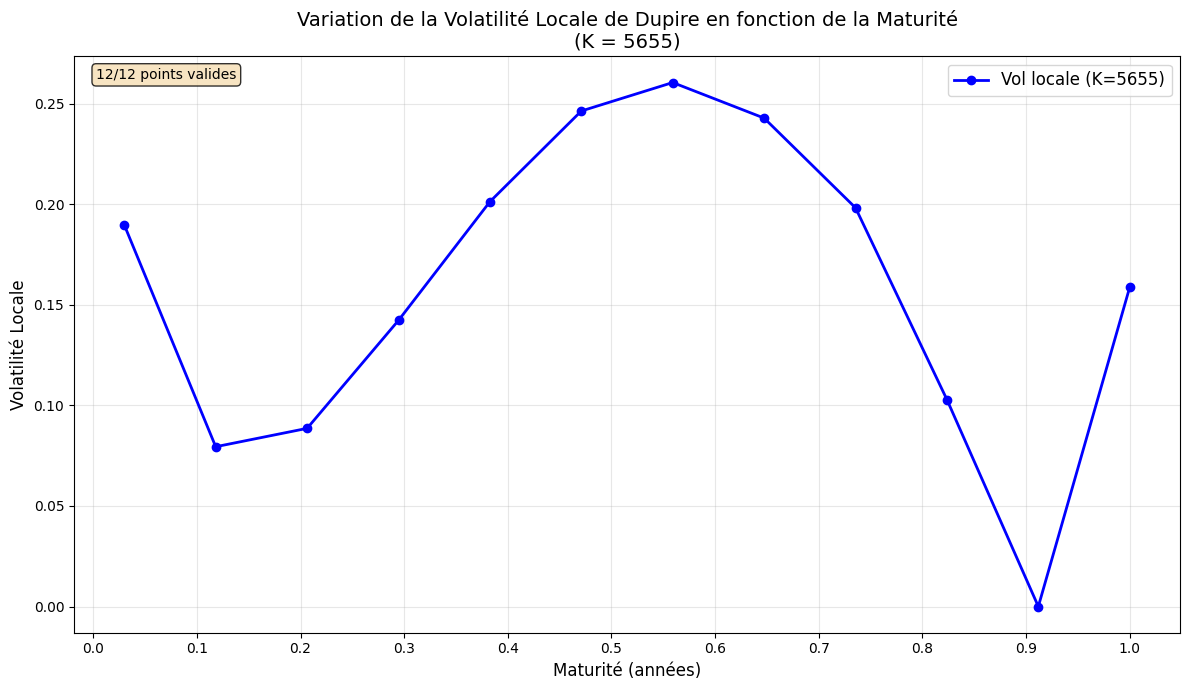


DataFrame des résultats:
          T     K  local_vol
0  0.030000  5655   0.189650
1  0.118182  5655   0.079431
2  0.206364  5655   0.088558
3  0.294545  5655   0.142243
4  0.382727  5655   0.201224
5  0.470909  5655   0.246308
6  0.559091  5655   0.260460
7  0.647273  5655   0.242780
8  0.735455  5655   0.198191
9  0.823636  5655   0.102853


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Paramètres
spot = 5655
K_calc = 5655  # Le strike fixe
r = 0.01921
q = 0.02

# Grille de maturités
T_values = np.linspace(0.03, 1.0, 12)

# Stockage des résultats
data = []

# Boucle sur les maturités
for T in T_values:
    try:
        vol = calculate_dupire_local_vol(T=T, K=K_calc, spot=spot, r=r, q=q)
        data.append({'T': T, 'K': K_calc, 'local_vol': vol})
    except Exception as e:
        print(f"Erreur pour T={T}: {e}")
        data.append({'T': T, 'K': K_calc, 'local_vol': np.nan})

# Création du DataFrame
df = pd.DataFrame(data)

# Tracé de la volatilité locale en fonction de la maturité
plt.figure(figsize=(12, 7))

# Filtrer les valeurs non-null pour un tracé propre
clean_df = df.dropna()

if len(clean_df) > 0:
    plt.plot(clean_df['T'], clean_df['local_vol'],
             'bo-', linewidth=2, markersize=6, label=f'Vol locale (K={K_calc})')

    plt.xlabel('Maturité (années)', fontsize=12)
    plt.ylabel('Volatilité Locale', fontsize=12)
    plt.title(f'Variation de la Volatilité Locale de Dupire en fonction de la Maturité\n(K = {K_calc})', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)

    # Ajustement des ticks pour plus de lisibilité
    plt.xticks(np.arange(0, 1.1, 0.1))

    # Ajout d'une annotation pour le nombre de points valides
    plt.text(0.02, 0.98, f'{len(clean_df)}/{len(df)} points valides',
             transform=plt.gca().transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
else:
    print("Aucune donnée valide à tracer")

plt.tight_layout()
plt.show()

# Affichage du DataFrame pour vérification
print("\nDataFrame des résultats:")
print(df.head(10))

[T=0.08, K=4524.0]
     - Term1 (d²IV/dK²)       = -6.768218386075116e-06
[T=0.08, K=4643.0526315789475]
     - Term1 (d²IV/dK²)       = 1.4395712315336505e-07
[T=0.08, K=4643.0526315789475] ⚠️ Variance locale négative ou nulle : -0.048996404888759684
[T=0.08, K=4762.105263157895]
     - Term1 (d²IV/dK²)       = 1.6537872527284702e-07
[T=0.08, K=4881.157894736842]
     - Term1 (d²IV/dK²)       = 1.8680032739219015e-07
[T=0.08, K=5000.210526315789]
     - Term1 (d²IV/dK²)       = 2.0822192951177628e-07
[T=0.08, K=5119.263157894737]
     - Term1 (d²IV/dK²)       = 2.2964353163111939e-07
[T=0.08, K=5238.315789473684]
     - Term1 (d²IV/dK²)       = 2.510651337504972e-07
[T=0.08, K=5357.368421052632]
     - Term1 (d²IV/dK²)       = 2.7248673586996185e-07
[T=0.08, K=5476.421052631578]
     - Term1 (d²IV/dK²)       = 2.939083379894004e-07
[T=0.08, K=5595.473684210526]
     - Term1 (d²IV/dK²)       = 3.1532994010888243e-07
[T=0.08, K=5714.526315789474]
     - Term1 (d²IV/dK²)       = 3.367515

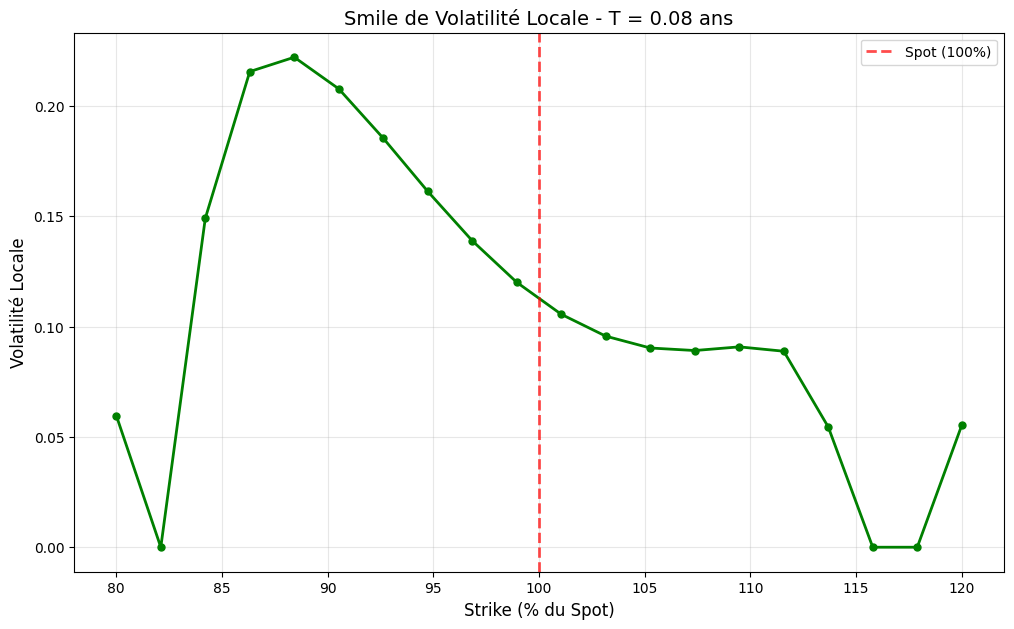


Volatilités locales pour T = 0.08 ans:
K = 80.0% -> vol = 0.0597
K = 82.1% -> vol = 0.0000
K = 84.2% -> vol = 0.1490
K = 86.3% -> vol = 0.2155
K = 88.4% -> vol = 0.2220
K = 90.5% -> vol = 0.2077
K = 92.6% -> vol = 0.1853
K = 94.7% -> vol = 0.1612
K = 96.8% -> vol = 0.1388
K = 98.9% -> vol = 0.1200
K = 101.1% -> vol = 0.1055
K = 103.2% -> vol = 0.0956
K = 105.3% -> vol = 0.0903
K = 107.4% -> vol = 0.0891
K = 109.5% -> vol = 0.0908
K = 111.6% -> vol = 0.0888
K = 113.7% -> vol = 0.0545
K = 115.8% -> vol = 0.0000
K = 117.9% -> vol = 0.0000
K = 120.0% -> vol = 0.0553


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
spot = 5655
T_fixe = 0.08
r, q = 0.01921, 0.02

# Grille de strikes en pourcentage du spot
K_percentages = np.linspace(80, 120, 20)  # De 80% à 120% du spot
K_values = spot * K_percentages / 100

# Calcul des volatilités locales
local_vols = []
valid_K = []

for K in K_values:
    try:
        vol = calculate_dupire_local_vol(T=T_fixe, K=K, spot=spot, r=r, q=q)
        local_vols.append(vol)
        valid_K.append(K)
    except Exception as e:
        print(f"Erreur pour K={K:.0f}: {e}")

# Tracé
if len(valid_K) > 0:
    plt.figure(figsize=(12, 7))

    # Convertir en pourcentages pour l'axe x
    K_pct = [k/spot * 100 for k in valid_K]

    plt.plot(K_pct, local_vols, 'go-', linewidth=2, markersize=5)

    # Ligne verticale pour le spot (100%)
    plt.axvline(x=100, color='red', linestyle='--', alpha=0.7, linewidth=2, label='Spot (100%)')

    plt.xlabel('Strike (% du Spot)', fontsize=12)
    plt.ylabel('Volatilité Locale', fontsize=12)
    plt.title(f'Smile de Volatilité Locale - T = {T_fixe} ans', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

    # Affichage des valeurs
    print(f"\nVolatilités locales pour T = {T_fixe} ans:")
    for k, vol in zip(K_pct, local_vols):
        print(f"K = {k:.1f}% -> vol = {vol:.4f}")
else:
    print("Aucune donnée valide calculée")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Paramètres de base
spot = 4400
r = 0.01921
q = 0.02
pas = 100

# Grilles de T et K
T_values = [0.08, 0.25, 0.5, 1, 2]
#K = np.array ((0.8, 0.9, 1.0, 1.1, 1.2 ) )
K_values = np.linspace(3279, 5695, pas)

# Stockage des résultats
data = []

for T in T_values:
    for K in K_values:
        vol = calculate_dupire_local_vol(T=T, K=K, spot=spot, r=r, q=q)
        data.append({'T': T, 'K': K, 'local_vol': vol})

# Création du DataFrame
df = pd.DataFrame(data)



        T            K  local_vol
97   0.08  5646.191919   0.059175
98   0.08  5670.595960   0.059147
197  0.25  5646.191919   0.070041
198  0.25  5670.595960   0.069189
297  0.50  5646.191919   0.176677
298  0.50  5670.595960   0.174802
397  1.00  5646.191919   0.127350
398  1.00  5670.595960   0.126638
497  2.00  5646.191919   0.122978
498  2.00  5670.595960   0.122294


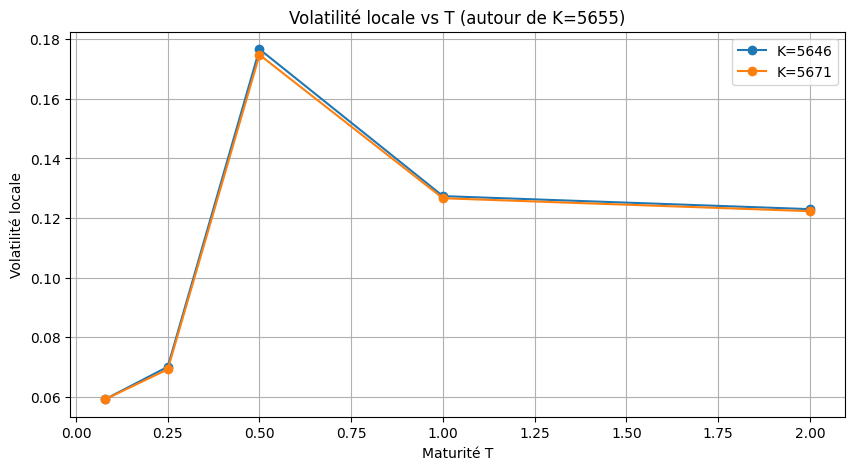

In [ ]:
# Plot 1 : Volatilité locale en fonction de T pour un K fixe - Low point pendant 5ans : 3279
K_target = 5655
pas = 20
df_T = df[np.abs(df['K'] - K_target) < pas]  # tolérance autour de K_target
print (df_T )
plt.figure(figsize=(10, 5))
for k in sorted(df_T['K'].unique()):
    subset = df_T[df_T['K'] == k]
    plt.plot(subset['T'], subset['local_vol'], marker='o', label=f'K={k:.0f}')
plt.title(f"Volatilité locale vs T (autour de K={K_target})")
plt.xlabel("Maturité T")
plt.ylabel("Volatilité locale")
plt.legend()
plt.grid(True)
plt.show()

# Nouvelle Test


In [111]:
from scipy import interpolate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# ************ 1. collecte des données   ***************************
T = np.array ( [0.003, 0.08, 0.25, 0.5, 1.0 ] )  # Maturité en année
K = np.array (( 0.8,   0.9,  0.95, 1.0, 1.05, 1.1, 1.2 ) )     # spot price

spot_price = 5655     # Prix spot fictif de l'EuroStoxx 50

# Grille de maturités (en années)
maturities = np.array([0.003, 0.08, 0.25, 0.5, 1.0 ])

# Grille de strikes (en % du spot)
strike_ratios = np.array([0.8, 0.9, 0.95, 1.0, 1.05, 1.1, 1.2])
strikes = strike_ratios * spot_price

# Surface de volatilité implicite fictive (en %) # Dimensions: 5 maturités × 7 strikes
iv_matrix2 = np.array([
    # 80%    90%    95%    100%    105%    110%    120%  (strike ratios)
    [88.94, 59.04, 36.85,  16.97,  23.49,  37.12,  53.28],  # 1 day (0.003 an) 11/11/2027
    [36.19, 24.03, 18.72,  14.41,  12.07,  13.24,  20.37],  # 1 mois (0.08 an) 5/12/2025
    [27.79, 21.00, 18.06,  15.58,  13.92,  13.08,  13.76],  # 3 mois (0.25 an) 20/02/2026
    [24.91, 19.95, 17.74,  15.91,  14.60,  13.79,  13.15],  # 6 mois (0.5 an)  15/05/2026
    [22.91, 19.52, 17.98,  16.68,  16.13,  15.66,  14.89],  # 1 an (1.0 an)    20/11/2026

])


In [127]:
# Étape 1 : Uploader le fichier Excel depuis ton ordinateur
from google.colab import files
uploaded = files.upload()  # Choisis le fichier SXE5 OVDV 1211.xlsx

# Étape 2 : Lire le fichier Excel avec pandas
import pandas as pd
import numpy as np

# Remplace par le nom exact du fichier uploadé
filename = "SXE5 OVDV 1211.xlsx"

# Lire la 2e feuille (index 1) sans en-tête
df = pd.read_excel(filename, sheet_name=0, header=None)

# Étape 3 : Extraire les strikes (première ligne, hors première colonne)
# Supprimer le symbole % et convertir en float
strike_ratios = df.iloc[0, 1:].str.replace('%', '').astype(float).values

# Étape 4 : Extraire les maturités (première colonne, hors première ligne)
maturities = df.iloc[1:, 0].astype(float).values

# Étape 5 : Extraire la matrice IV (le reste du tableau)
iv_matrix = df.iloc[1:, 1:].astype(float).values

# Étape 6 : Afficher les résultats
print("Strikes (%):", strikes)
print("Maturities (years):", maturities)
print("IV Matrix shape:", iv_matrix.shape)
print("IV Matrix (extrait):\n", iv_matrix[:5, :7])  # Affiche un extrait

Saving SXE5 OVDV 1211.xlsx to SXE5 OVDV 1211 (15).xlsx
Strikes (%): [4524.   5089.5  5372.25 5655.   5937.75 6220.5  6786.  ]
Maturities (years): [8.33333333e-02 1.66666667e-01 4.16666667e-01 5.00000000e-01
 7.50000000e-01 1.91666667e+00 2.50000000e+00 3.08333333e+00
 3.41666667e+00 4.25000000e+00 4.83333333e+00 5.41666667e+00
 8.33333333e+00 1.06666667e+01 1.30000000e+01 1.53333333e+01
 1.82500000e+01 2.05833333e+01 2.35000000e+01 2.58333333e+01
 2.81666667e+01 3.10833333e+01 3.34166667e+01 4.10000000e+01
 4.85833333e+01 5.61666667e+01 6.37500000e+01 7.13333333e+01
 7.89166667e+01 8.65000000e+01 9.40833333e+01 1.25000000e+02
 1.55333333e+02 1.85666667e+02 2.16000000e+02 2.46333333e+02
 2.76666667e+02 2.77833333e+02]
IV Matrix shape: (38, 9)
IV Matrix (extrait):
 [[29.28 29.28 29.28 19.03 13.68 13.68 13.68]
 [29.28 29.28 29.28 19.03 13.68 13.68 13.68]
 [21.16 21.16 21.16 16.28 12.28 10.55 10.55]
 [20.48 20.48 20.48 16.69 12.94 11.43 11.43]
 [50.58 30.55 21.02 16.97 13.81 12.79 14.01]]


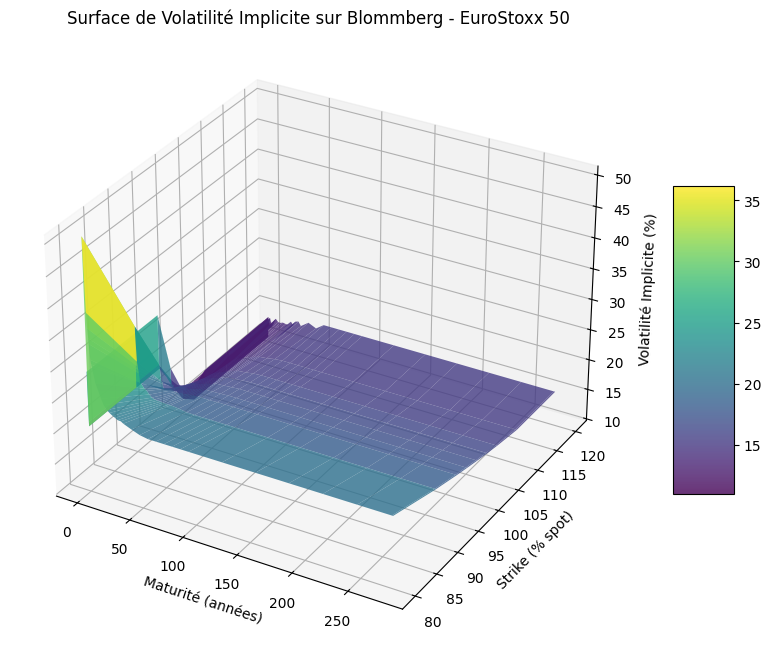

In [115]:
# Création de la grille
T_mesh, K_mesh = np.meshgrid(maturities, strike_ratios)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface 3D
surf = ax.plot_surface(T_mesh, K_mesh, iv_matrix.T, cmap='viridis', alpha=0.8, linewidth=0, antialiased=True)

ax.set_xlabel('Maturité (années)')
ax.set_ylabel('Strike (% spot)')
ax.set_zlabel('Volatilité Implicite (%)')
ax.set_title('Surface de Volatilité Implicite sur Blommberg - EuroStoxx 50')

plt.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()

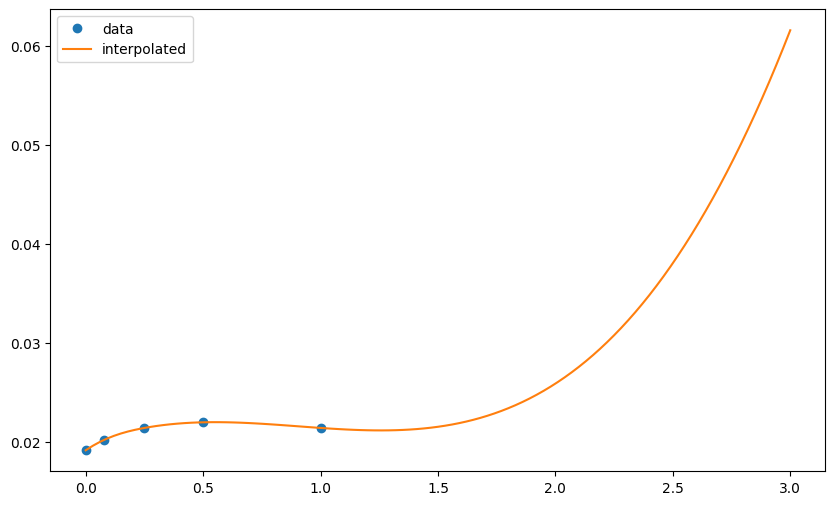

In [123]:

from scipy import interpolate

# Taux sans risque r(T):
rates_dates = np.array([0.003, 0.08, 0.25, 0.5, 1.0 ])

rates_values = np.array([0.01921, 0.02023, 0.02142, 0.02199, 0.02142])  # taux
rate_curve = interpolate.interp1d(rates_dates, rates_values,kind='cubic', fill_value='extrapolate')
r = rate_curve(T)

dividend_dates = np.array([0.003, 0.08, 0.25, 0.5, 1.0 ])

dividend_values = np.array([0.02, 0.02, 0.02, 0.02, 0.02])  # taux
dividend_curve = interpolate.interp1d(rates_dates, rates_values, kind='cubic', fill_value='extrapolate')

q = dividend_curve(T)

# plot zc curve interpolated
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
maturities = np.linspace(0, 3, num=101, endpoint=True)
plt.plot(rates_dates, rates_values, 'o', maturities, rate_curve(maturities))
plt.legend(['data', 'interpolated'], loc='best')
plt.show()

In [128]:
# *******************************************************
T_array = maturities
K_array = strike_ratios
IV_array = iv_matrix / 100  # Conversion en decimal (0.225 au lieu de 22.5%)

# Création de la surface d'interpolation
# iv_surface = interpolate.RectBivariateSpline(T_array, K_array, IV_array, kx=3, ky=3, s=0.1)  # s = paramètre de lissage
iv_surface = interpolate.RectBivariateSpline(maturities, strike_ratios, IV_array, kx=3, ky=3, s=0.1)  # s = paramètre de lissage

In [129]:

# **************************************************************************************************************************************
def calculate_dupire_local_vol(T, K, spot, r, q):
    # 1. Volatilité implicite et ses dérivées
    iv = iv_surface(T, K)[0][0]
    if iv == 0:
        print(f"[T={T}, K={K}] ⚠️ Volatilité implicite nulle")

    # Dérivée par rapport au temps
    dT = 0.001
    iv_T_plus = iv_surface(T + dT, K)[0][0]
    dIV_dT = (iv_T_plus - iv) / dT

    # Dérivée première par rapport à K
    dK = 0.01 * spot
    iv_K_plus = iv_surface(T, K + dK)[0][0]
    iv_K_minus = iv_surface(T, K - dK)[0][0]
    dIV_dK = (iv_K_plus - iv_K_minus) / (2 * dK)

    # Dérivée seconde par rapport à K
    d2IV_dK2 = (iv_K_plus - 2 * iv + iv_K_minus) / (dK ** 2)

    # 2. Calcul de d+
    try:
        d_plus = (np.log(spot / K) + (r - q + 0.5 * iv ** 2) * T) / (iv * np.sqrt(T))
    except ZeroDivisionError:
        print(f"[T={T}, K={K}] ⚠️ Division par zéro dans d_plus")
        return 0

    # 3. Application formule Dupire
    numerator = 2 * dIV_dT + iv / T + 2 * K * (r - q) * dIV_dK
    denominator_term1 = d2IV_dK2
    denominator_term2 = -d_plus * np.sqrt(T) * (dIV_dK) ** 2
    denominator_term3 = (1 / iv) * (1 / (K * np.sqrt(T)) + d_plus * dIV_dK) ** 2

    denominator = K ** 2 * (denominator_term1 + denominator_term2 + denominator_term3)

    print(f"[T={T}, K={K}]")
    print(f"     - numerator       = {numerator}, where > dIV_dT = {dIV_dT}, and \"iv / T\" = {iv / T}, and \"dIV_dK\" = {dIV_dK}")

    print(f"  ➤ Termes du dénominateur :")
    print(f"     - denominator_Term1 (d²IV/dK²)       = {denominator_term1}")
    print(f"     - denominator_Term2 (-d⁺√T·(dIV/dK)²) = {denominator_term2}")
    print(f"     - denominator_Term3 (1/IV · ...)     = {denominator_term3}")
#--------------------------------------------------------------------------------------------------------------------------------------


# -------------------------------------------------------------------------------------------------------------------------------------------
    local_var = numerator / denominator
# -------------------------------------------------------------------------------------------------------------------------------------------

    print(f"[T={T}, K={K}] ⚠️ Variance locale: {local_var}, écart-type : {np.sqrt(local_var)}")
# -------------------------------------------------------------------------------------------------------------------------------------------


    return np.sqrt(local_var)
# -------------------------------------------------------------------------------------------------------------------------------------------




In [130]:
spot = 5655
r = 0.01921
q = 0.02
pas = 100

# Grilles de T et K
T_values = [0.08, 0.25, 0.5, 1, 2]
K_values = np.linspace(3279, 5695, pas)


calculate_dupire_local_vol(T=0.003, K=4524, spot=spot, r=r, q=q)



[T=0.003, K=4524]
     - numerator       = 42.50425442771219, where > dIV_dT = 0.0, and "iv / T" = 42.50425442771219, and "dIV_dK" = 0.0
  ➤ Termes du dénominateur :
     - denominator_Term1 (d²IV/dK²)       = 0.0
     - denominator_Term2 (-d⁺√T·(dIV/dK)²) = -0.0
     - denominator_Term3 (1/IV · ...)     = 0.00012772617172919672
[T=0.003, K=4524] ⚠️ Variance locale: 0.01625950480010122, écart-type : 0.12751276328313657


np.float64(0.12751276328313657)

[T=0.03, K=4524]
     - numerator       = 4.25042544277122, where > dIV_dT = 0.0, and "iv / T" = 4.25042544277122, and "dIV_dK" = 0.0
  ➤ Termes du dénominateur :
     - denominator_Term1 (d²IV/dK²)       = 0.0
     - denominator_Term2 (-d⁺√T·(dIV/dK)²) = -0.0
     - denominator_Term3 (1/IV · ...)     = 1.2772617172919674e-05
[T=0.03, K=4524] ⚠️ Variance locale: 0.01625950480010122, écart-type : 0.12751276328313657
[T=0.11818181818181818, K=4524]
     - numerator       = 1.0813552174339691, where > dIV_dT = 0.0010460744190587956, and "iv / T" = 1.0792630685958515, and "dIV_dK" = 0.0
  ➤ Termes du dénominateur :
     - denominator_Term1 (d²IV/dK²)       = 0.0
     - denominator_Term2 (-d⁺√T·(dIV/dK)²) = -0.0
     - denominator_Term3 (1/IV · ...)     = 3.2413517053515196e-06
[T=0.11818181818181818, K=4524] ⚠️ Variance locale: 0.01630035378392367, écart-type : 0.12767283886529535
[T=0.20636363636363636, K=4524]
     - numerator       = 0.6206024717203487, where > dIV_dT = 0.00103845583629

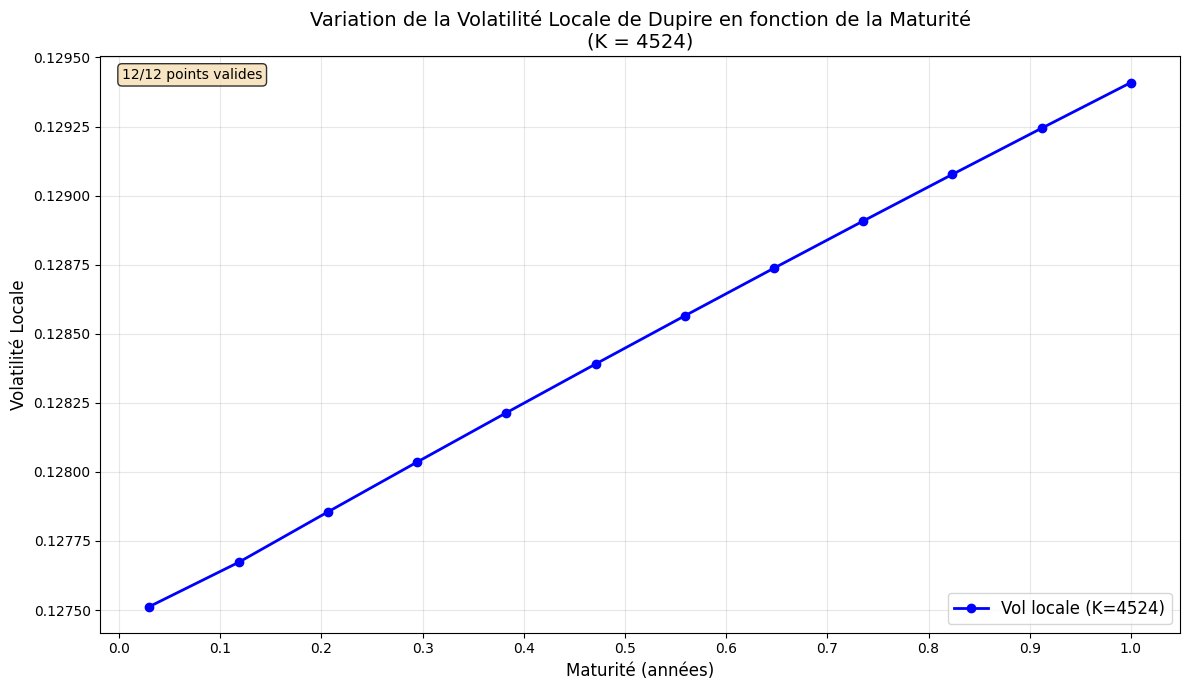


DataFrame des résultats:
          T     K  local_vol
0  0.030000  4524   0.127513
1  0.118182  4524   0.127673
2  0.206364  4524   0.127855
3  0.294545  4524   0.128036
4  0.382727  4524   0.128214
5  0.470909  4524   0.128391
6  0.559091  4524   0.128565
7  0.647273  4524   0.128738
8  0.735455  4524   0.128908
9  0.823636  4524   0.129077


In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Paramètres
spot = 5655
K_calc = 4524  # Le strike fixe
r = 0.01921
q = 0.02

# Grille de maturités
T_values = np.linspace(0.03, 1.0, 12)

# Stockage des résultats
data = []

# Boucle sur les maturités
for T in T_values:
    try:
        vol = calculate_dupire_local_vol(T=T, K=K_calc, spot=spot, r=r, q=q)
        data.append({'T': T, 'K': K_calc, 'local_vol': vol})
    except Exception as e:
        print(f"Erreur pour T={T}: {e}")
        data.append({'T': T, 'K': K_calc, 'local_vol': np.nan})

# Création du DataFrame
df = pd.DataFrame(data)

# Tracé de la volatilité locale en fonction de la maturité
plt.figure(figsize=(12, 7))

# Filtrer les valeurs non-null pour un tracé propre
clean_df = df.dropna()

if len(clean_df) > 0:
    plt.plot(clean_df['T'], clean_df['local_vol'],
             'bo-', linewidth=2, markersize=6, label=f'Vol locale (K={K_calc})')

    plt.xlabel('Maturité (années)', fontsize=12)
    plt.ylabel('Volatilité Locale', fontsize=12)
    plt.title(f'Variation de la Volatilité Locale de Dupire en fonction de la Maturité\n(K = {K_calc})', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)

    # Ajustement des ticks pour plus de lisibilité
    plt.xticks(np.arange(0, 1.1, 0.1))

    # Ajout d'une annotation pour le nombre de points valides
    plt.text(0.02, 0.98, f'{len(clean_df)}/{len(df)} points valides',
             transform=plt.gca().transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
else:
    print("Aucune donnée valide à tracer")

plt.tight_layout()
plt.show()

# Affichage du DataFrame pour vérification
print("\nDataFrame des résultats:")
print(df.head(10))

[T=0.08, K=4524.0]
     - numerator       = 1.593909541039207, where > dIV_dT = 0.0, and "iv / T" = 1.593909541039207, and "dIV_dK" = 0.0
  ➤ Termes du dénominateur :
     - denominator_Term1 (d²IV/dK²)       = 0.0
     - denominator_Term2 (-d⁺√T·(dIV/dK)²) = -0.0
     - denominator_Term3 (1/IV · ...)     = 4.789731439844877e-06
[T=0.08, K=4524.0] ⚠️ Variance locale: 0.016259504800101222, écart-type : 0.12751276328313657
[T=0.08, K=4643.0526315789475]
     - numerator       = 1.593909541039207, where > dIV_dT = 0.0, and "iv / T" = 1.593909541039207, and "dIV_dK" = 0.0
  ➤ Termes du dénominateur :
     - denominator_Term1 (d²IV/dK²)       = 0.0
     - denominator_Term2 (-d⁺√T·(dIV/dK)²) = -0.0
     - denominator_Term3 (1/IV · ...)     = 4.547253253869824e-06
[T=0.08, K=4643.0526315789475] ⚠️ Variance locale: 0.01625950480010122, écart-type : 0.12751276328313657
[T=0.08, K=4762.105263157895]
     - numerator       = 1.593909541039207, where > dIV_dT = 0.0, and "iv / T" = 1.59390954103920

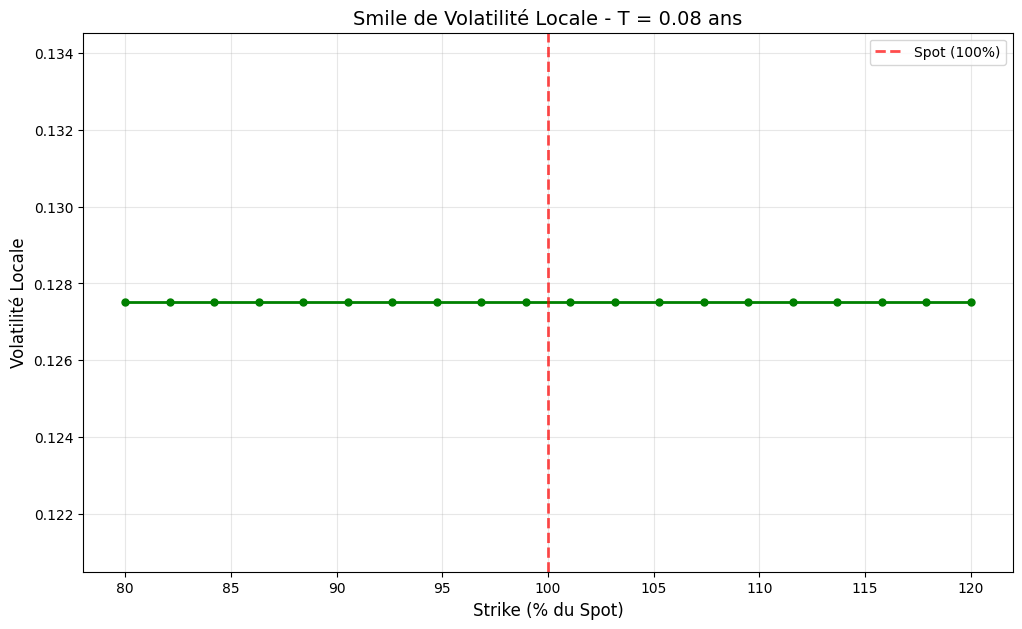


Volatilités locales pour T = 0.08 ans:
K = 80.0% -> vol = 0.1275
K = 82.1% -> vol = 0.1275
K = 84.2% -> vol = 0.1275
K = 86.3% -> vol = 0.1275
K = 88.4% -> vol = 0.1275
K = 90.5% -> vol = 0.1275
K = 92.6% -> vol = 0.1275
K = 94.7% -> vol = 0.1275
K = 96.8% -> vol = 0.1275
K = 98.9% -> vol = 0.1275
K = 101.1% -> vol = 0.1275
K = 103.2% -> vol = 0.1275
K = 105.3% -> vol = 0.1275
K = 107.4% -> vol = 0.1275
K = 109.5% -> vol = 0.1275
K = 111.6% -> vol = 0.1275
K = 113.7% -> vol = 0.1275
K = 115.8% -> vol = 0.1275
K = 117.9% -> vol = 0.1275
K = 120.0% -> vol = 0.1275


In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
spot = 5655
T_fixe = 0.08
r, q = 0.01921, 0.02

# Grille de strikes en pourcentage du spot
K_percentages = np.linspace(80, 120, 20)  # De 80% à 120% du spot
K_values = spot * K_percentages / 100

# Calcul des volatilités locales
local_vols = []
valid_K = []

for K in K_values:
    try:
        vol = calculate_dupire_local_vol(T=T_fixe, K=K, spot=spot, r=r, q=q)
        local_vols.append(vol)
        valid_K.append(K)
    except Exception as e:
        print(f"Erreur pour K={K:.0f}: {e}")

# Tracé
if len(valid_K) > 0:
    plt.figure(figsize=(12, 7))

    # Convertir en pourcentages pour l'axe x
    K_pct = [k/spot * 100 for k in valid_K]

    plt.plot(K_pct, local_vols, 'go-', linewidth=2, markersize=5)

    # Ligne verticale pour le spot (100%)
    plt.axvline(x=100, color='red', linestyle='--', alpha=0.7, linewidth=2, label='Spot (100%)')

    plt.xlabel('Strike (% du Spot)', fontsize=12)
    plt.ylabel('Volatilité Locale', fontsize=12)
    plt.title(f'Smile de Volatilité Locale - T = {T_fixe} ans', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

    # Affichage des valeurs
    print(f"\nVolatilités locales pour T = {T_fixe} ans:")
    for k, vol in zip(K_pct, local_vols):
        print(f"K = {k:.1f}% -> vol = {vol:.4f}")
else:
    print("Aucune donnée valide calculée")